In [57]:
import torch
from IPython.display import Image  # for displaying images
import os
import random
import shutil
from sklearn.model_selection import train_test_split
import xml.etree.ElementTree as ET
from xml.dom import minidom
from tqdm import tqdm
from PIL import Image, ImageDraw
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from skimage import io
from pathlib import Path
import cv2


random.seed(108)

In [58]:
image_name = "0002_000103"

In [59]:
root_dir = Path.cwd().parents[0]
data_dir = root_dir / "data"


In [60]:
data_names = [
    "class",
    "bbox_x",
    "bbox_y",
    "bbox_width",
    "bbox_height",
]
df = pd.read_csv(
    data_dir / f"processed/KITTI/train/labels/{image_name}.txt",
    delimiter=" ",
    names=data_names,
    index_col=False,
)

df.head()

,class,bbox_x,bbox_y,bbox_width,bbox_height
0,0,0.842164,0.750961,0.314061,0.492744
1,0,0.360262,0.525427,0.082830,0.106116
2,1,0.357062,0.530226,0.014203,0.155641
3,2,0.782181,0.548381,0.084504,0.203074
4,0,0.568318,0.494488,0.067869,0.084742


In [61]:
from enum import Enum


class ObjectDetectClasses(Enum):
    Car = 0
    Pedestrian = 1
    Cyclist = 2

In [62]:
ObjectDetectClasses(2).name


'Cyclist'

In [63]:
img = io.imread(data_dir / f"processed/KITTI/train/images/{image_name}.jpeg")

img_width = img.shape[1]
img_height = img.shape[0]

print(img_width, img_height)


1242 375


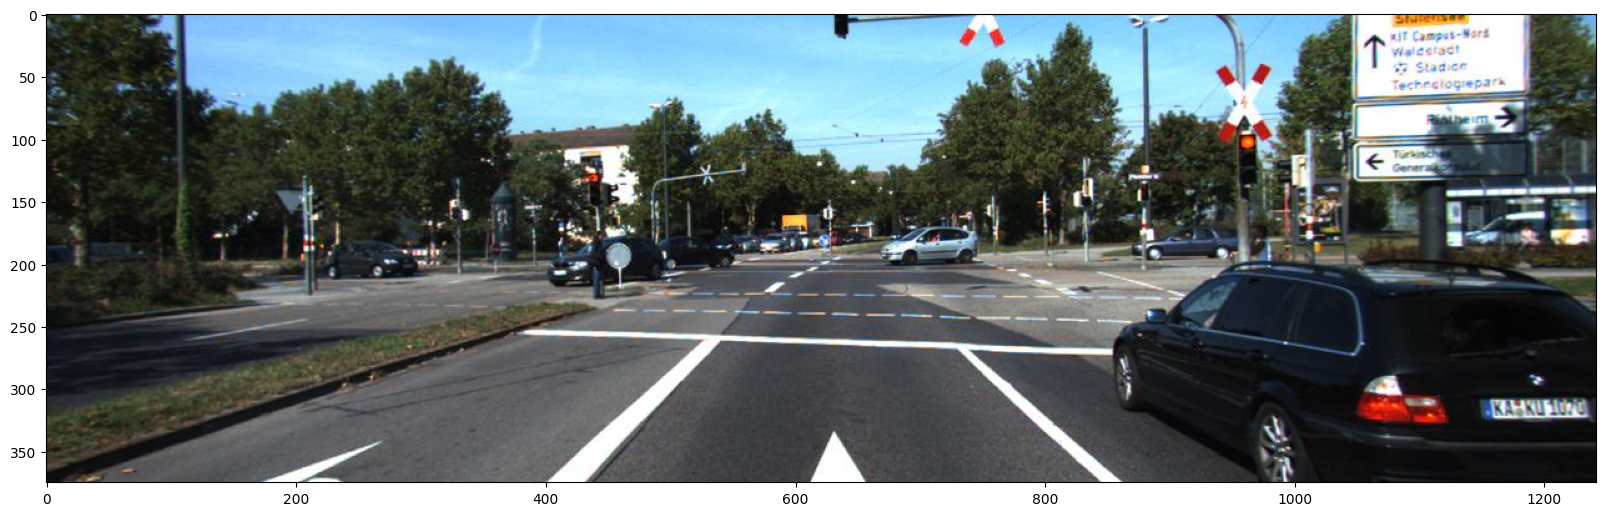

In [64]:
plt.figure(figsize=(20, 20))
plt.imshow(img)
plt.show()

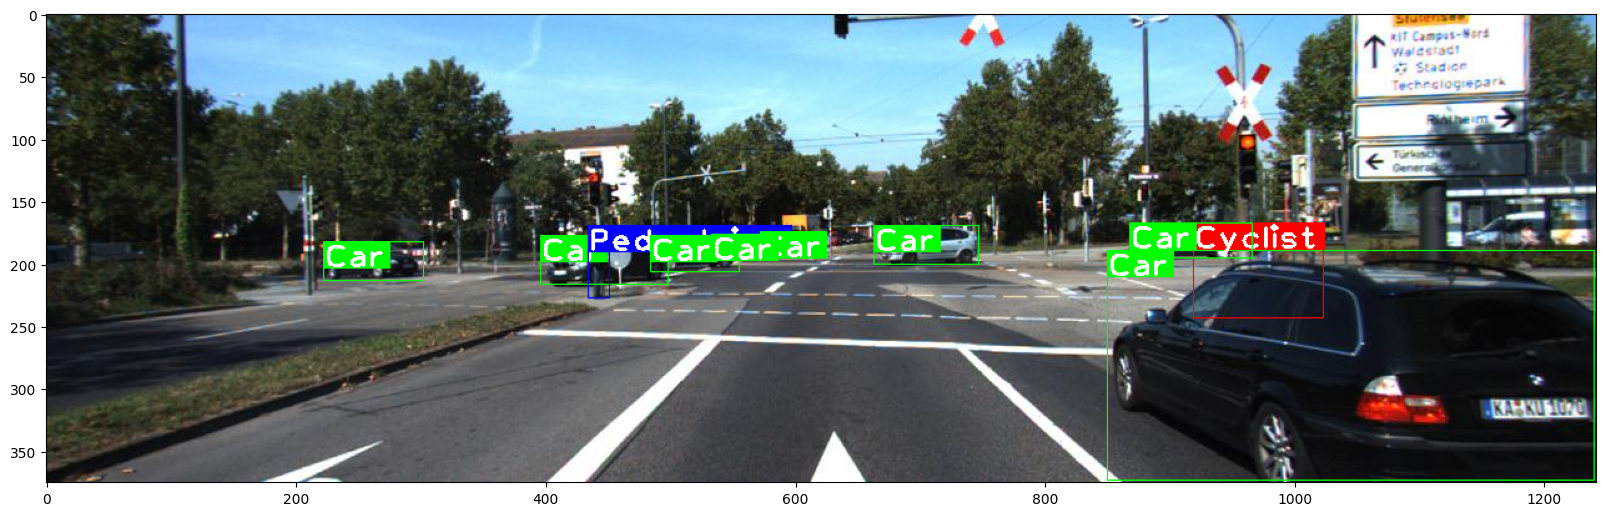

In [65]:
for index, row in df.iterrows():
    object_detect_class = ObjectDetectClasses(row["class"])

    match object_detect_class.name:
        case "Cyclist":
            frame_color = (255, 0, 0)

        case "Car":
            frame_color = (0, 255, 0)

        case "Pedestrian":
            frame_color = (0, 0, 255)

    bbox_width = int(row["bbox_width"] * img_width)
    bbox_height = int(row["bbox_height"] * img_height)

    bbox_left = int(row["bbox_x"] * img_width - bbox_width / 2)
    bbox_top = int(row["bbox_y"] * img_height - bbox_height / 2)
    bbox_right = int(bbox_left + bbox_width)
    bbox_bottom = int(bbox_top + bbox_height)

    img = cv2.rectangle(
        img,
        (bbox_left, bbox_top),
        (bbox_right, bbox_bottom),
        color=frame_color,
    )

    ((label_width, label_height), _) = cv2.getTextSize(
        object_detect_class.name, fontFace=cv2.FONT_HERSHEY_PLAIN, fontScale=1.75, thickness=2
    )

    img = cv2.rectangle(
        img,
        (bbox_left, bbox_top),
        (
            int(bbox_left + label_width + label_width * 0.05),
            int(bbox_top + label_height + label_height * 0.25),
        ),
        color=frame_color,
        thickness=cv2.FILLED,
    )

    img = cv2.putText(
        img,
        object_detect_class.name,
        org=(
            bbox_left,
            int(bbox_top + label_height + label_height * 0.25),
        ),
        fontFace=cv2.FONT_HERSHEY_PLAIN,
        fontScale=1.75,
        color=(255, 255, 255),
        thickness=2,
    )

plt.figure(figsize=(20, 20))
plt.imshow(img)
plt.show()